In [280]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn import cluster 
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import cluster 
import warnings
warnings.filterwarnings("ignore")
from datetime import date
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.linear_model import Lasso

In [281]:
cars=pd.read_csv("all-cars.csv")

In [282]:
cars

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,38203,2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,40083,2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,42573,2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,24641,1.9,4.0,170,22,29,2822,101,180


In [283]:
cars.fillna(cars["Cylinders"].mode().iloc[0],inplace=True)

In [284]:
cars.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [285]:
# Train statistical summary
cars.describe(include = 'all')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,C240 4dr,Sedan,Asia,Front,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,32774.855140,30014.700935,3.196729,5.808411,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,19431.716674,17642.117750,1.108595,1.554844,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


<AxesSubplot:>

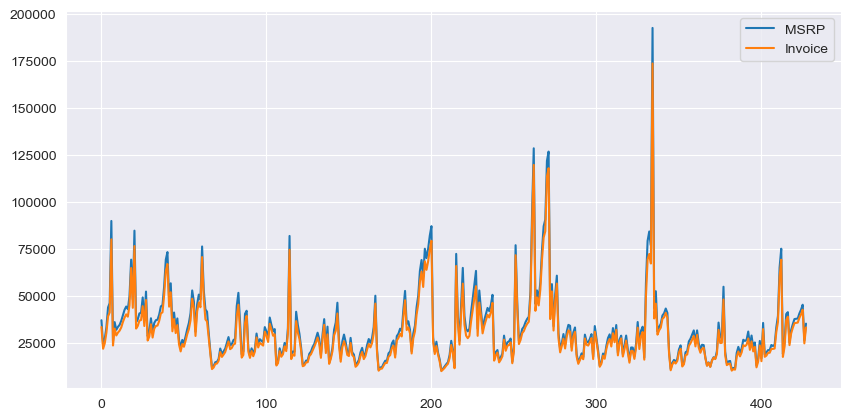

In [286]:
cars[['MSRP','Invoice']].plot()

[]

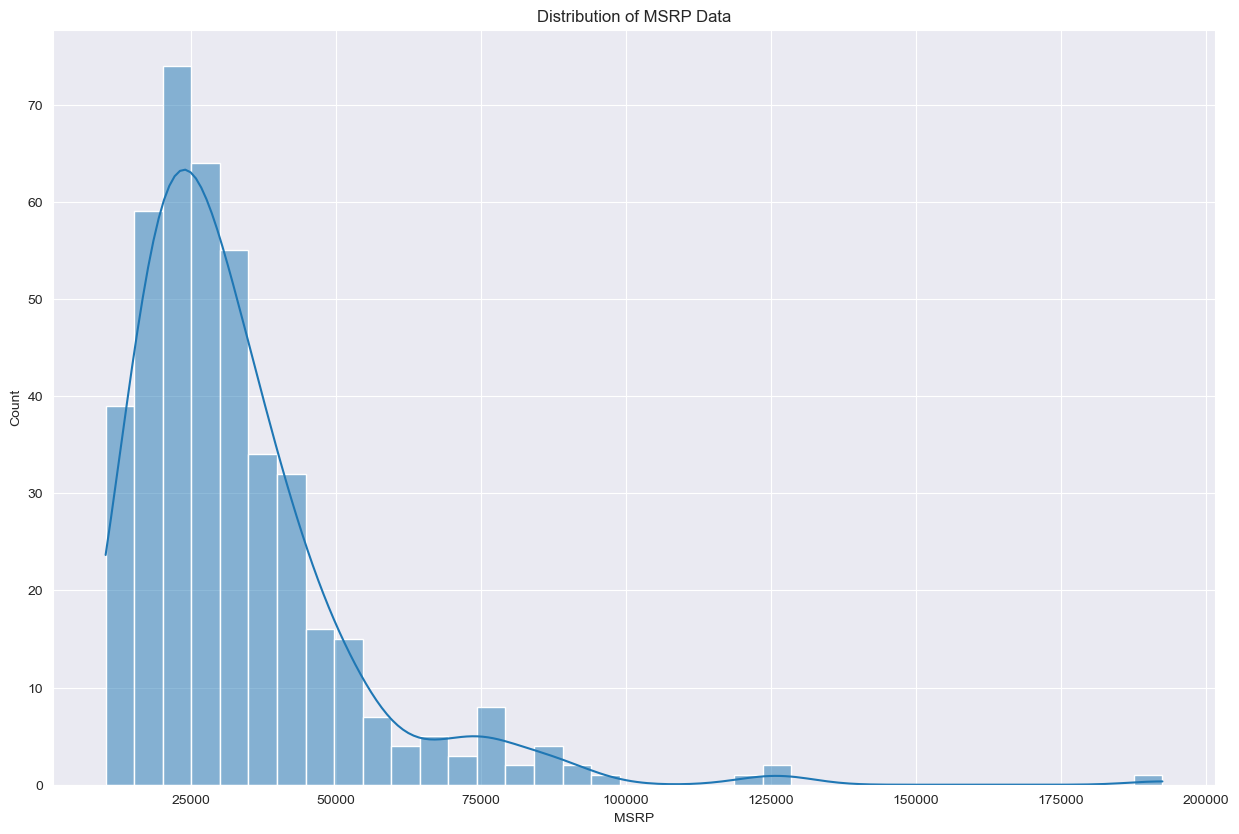

In [287]:
plt.figure(figsize=(15,10))
plt.title(f"Distribution of MSRP Data")
sns.histplot(cars['MSRP'],kde=True)
plt.plot()

<AxesSubplot:xlabel='Type', ylabel='MSRP'>

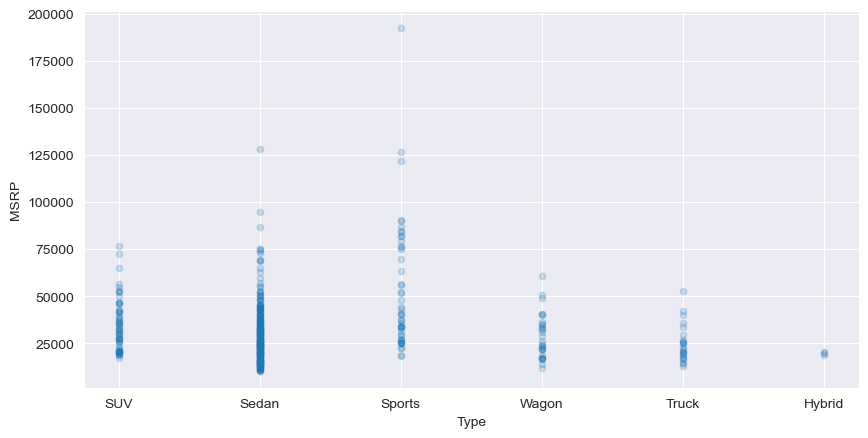

In [288]:
cars.plot(x='Type', y='MSRP', kind='scatter', alpha=0.2)

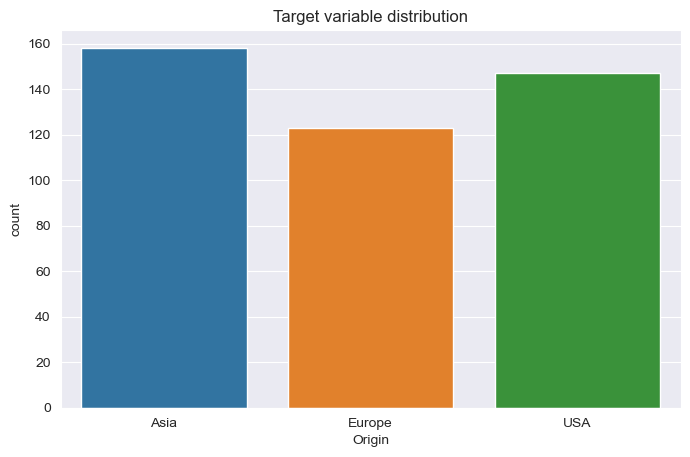

In [289]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(cars["Origin"])
plt.title('Target variable distribution')
plt.show()

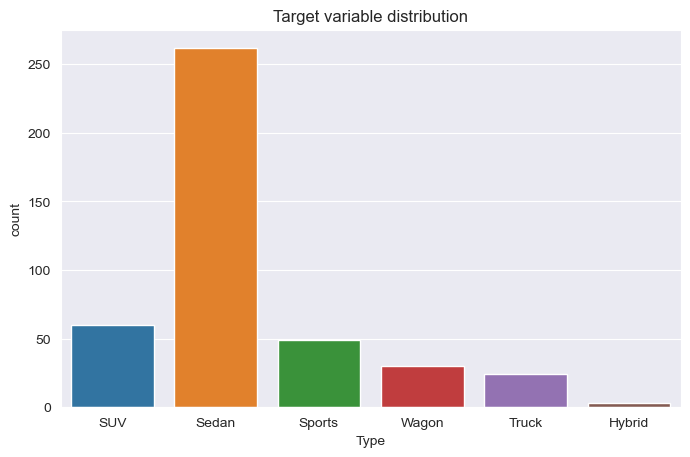

In [290]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(cars["Type"])
plt.title('Target variable distribution')
plt.show()

In [291]:
dic_Make={'Toyota': 1,
 'Chevrolet': 2,
 'Mercedes-Benz': 3,
 'Ford': 4,
 'BMW': 5,
 'Audi': 6,
 'Honda': 7,
 'Nissan': 8,
 'Volkswagen': 9,
 'Chrysler': 10,
 'Mitsubishi': 11,
 'Dodge': 12,
 'Volvo': 13,
 'Hyundai': 14,
 'Jaguar': 15,
 'Pontiac': 16,
 'Kia': 17,
 'Mazda': 18,
 'Lexus': 19,
 'Subaru': 20,
 'Mercury': 21,
 'Buick': 22,
 'Lincoln': 23,
 'Suzuki': 24,
 'Infiniti': 25,
 'GMC': 26,
 'Cadillac': 27,
 'Saturn': 28,
 'Acura': 29,
 'Saab': 30,
 'Porsche': 31,
 'Jeep': 32,
 'Land Rover': 33,
 'Oldsmobile': 34,
 'MINI': 35,
 'Isuzu': 36,
 'Scion': 37,
 'Hummer': 38}

In [292]:
cars.Make.replace(dic_Make,inplace=True)

In [293]:
cars.drop('Model',axis=1,inplace=True)

In [294]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    int64  
 1   Type         428 non-null    object 
 2   Origin       428 non-null    object 
 3   DriveTrain   428 non-null    object 
 4   MSRP         428 non-null    int64  
 5   Invoice      428 non-null    int64  
 6   EngineSize   428 non-null    float64
 7   Cylinders    428 non-null    float64
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 46.9+ KB


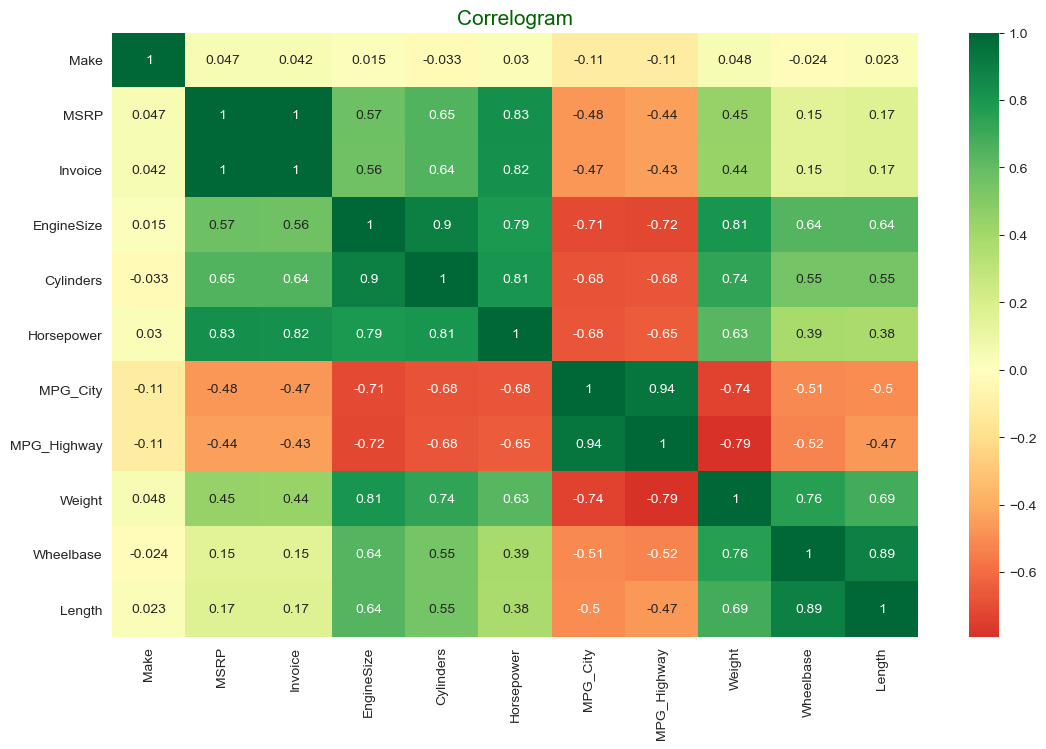

In [295]:
#### Quantify correlations
corr = cars.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

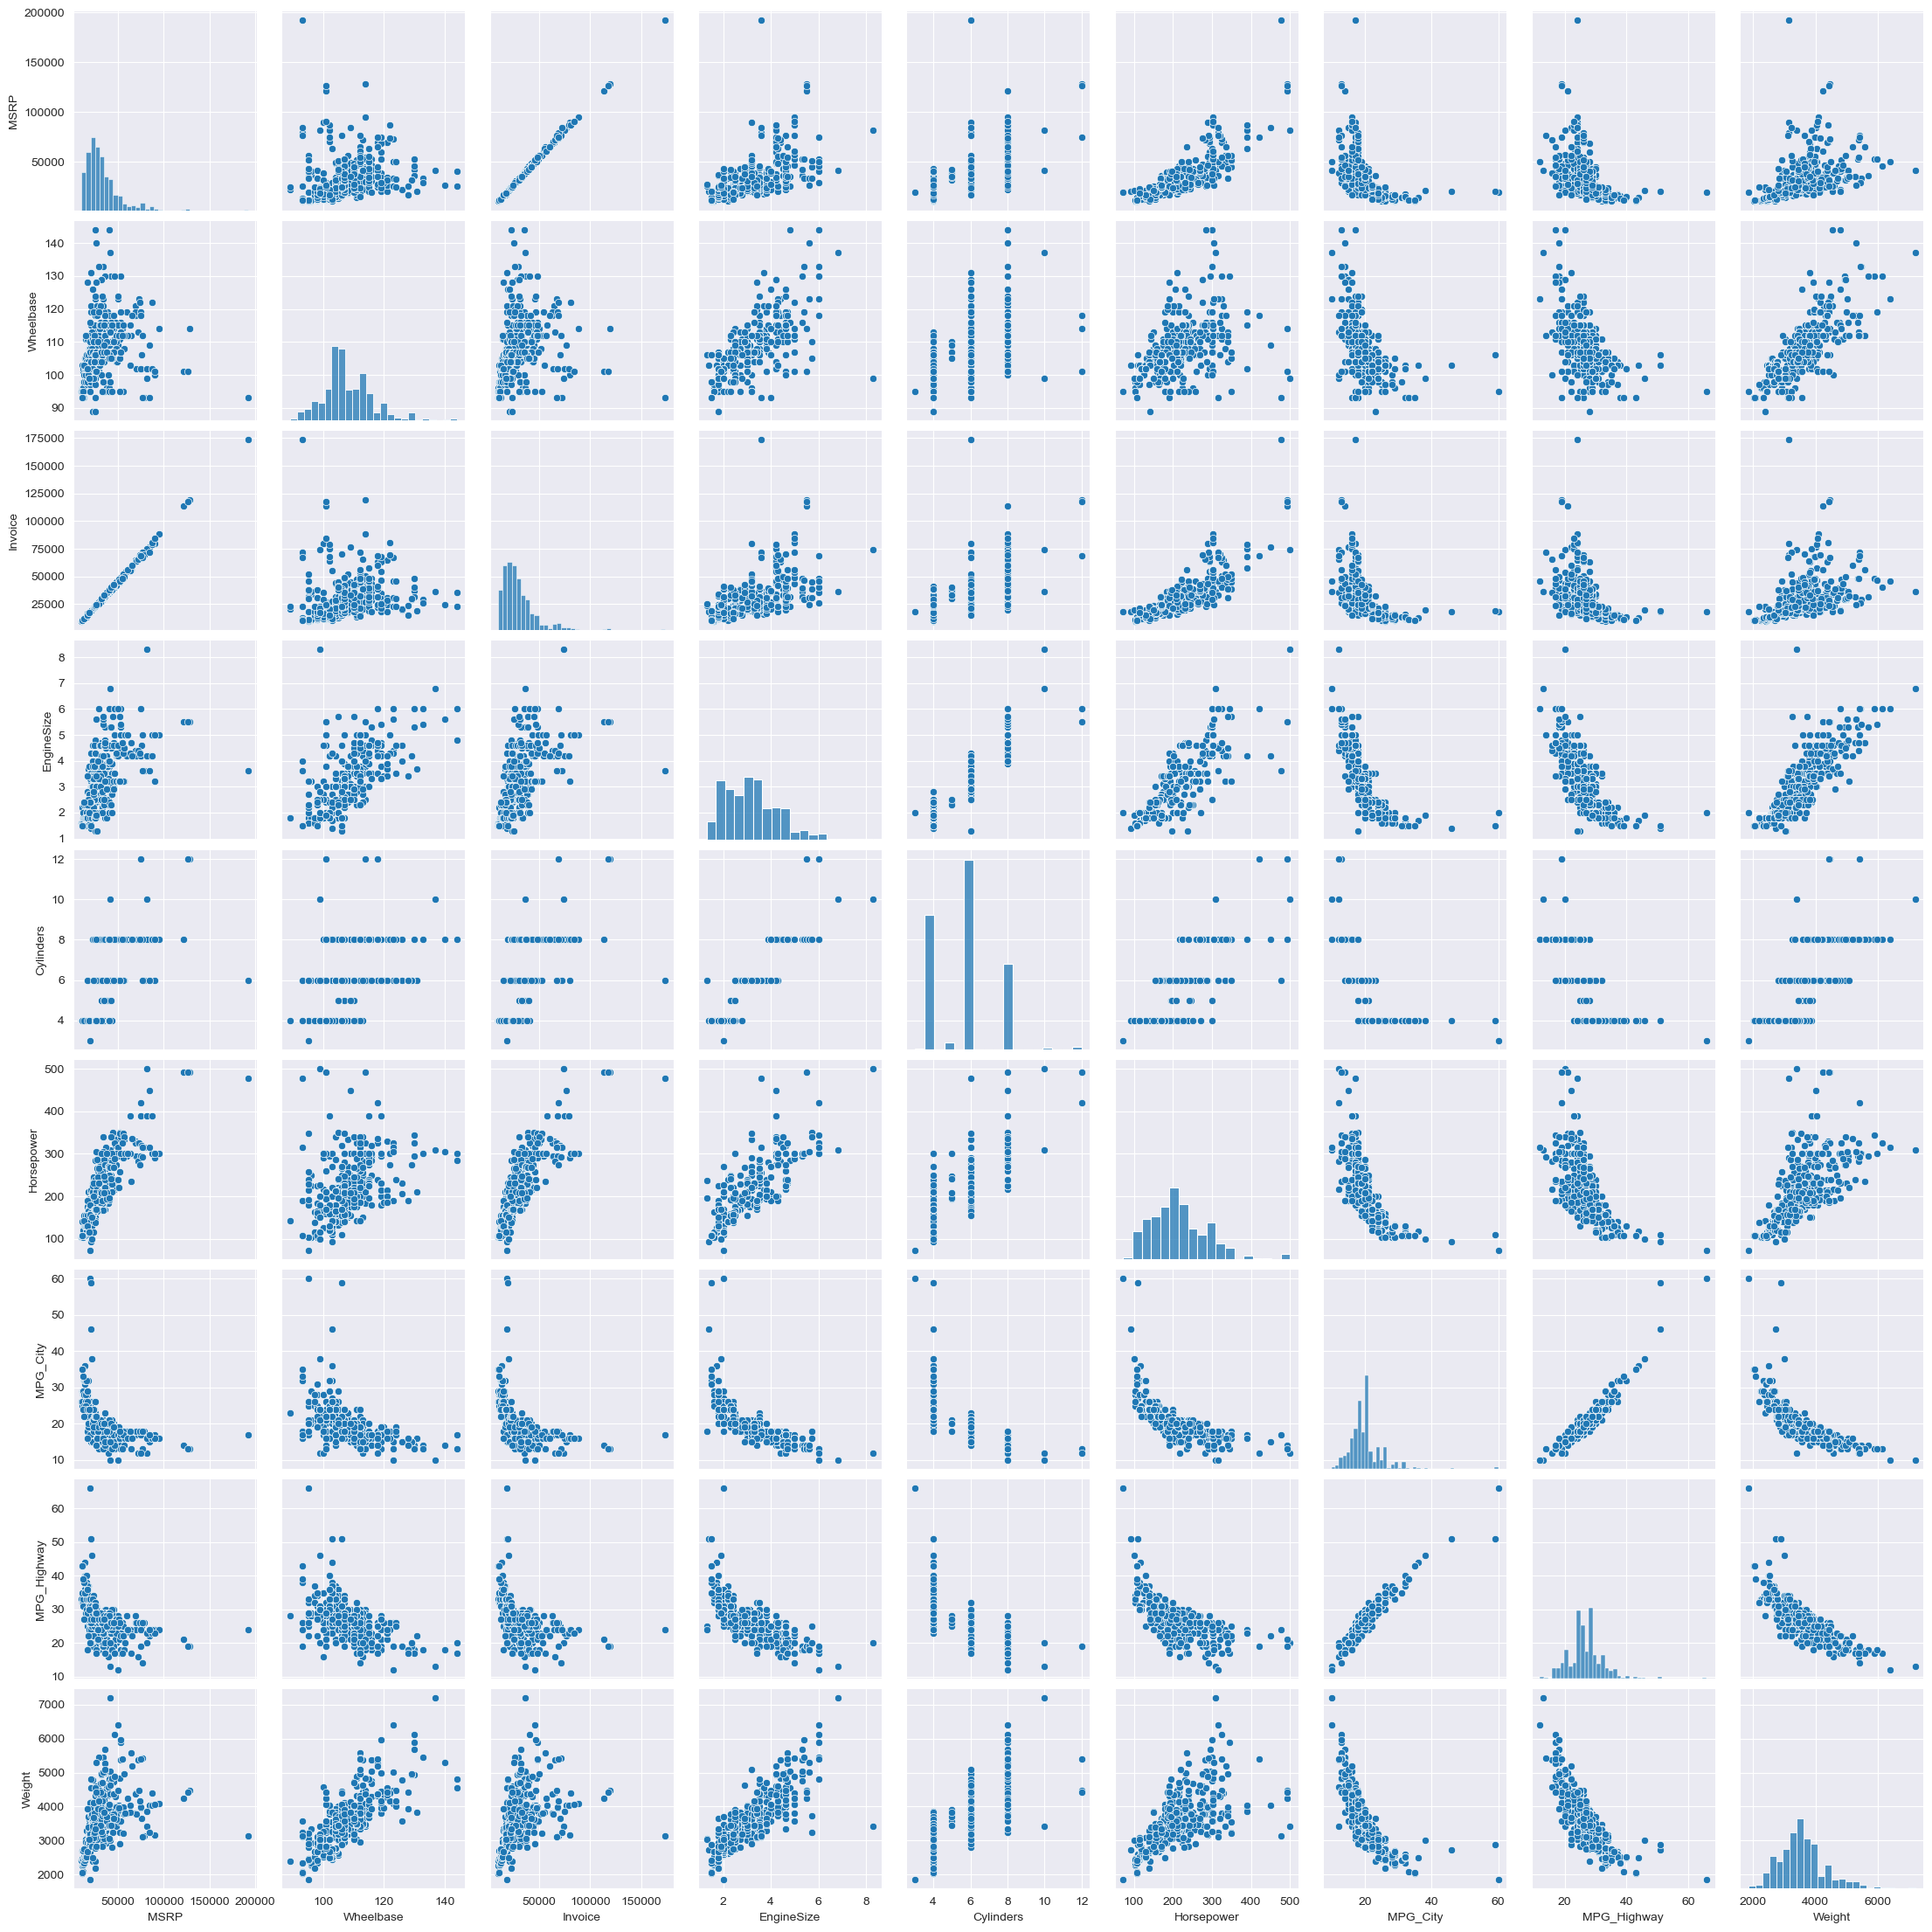

In [296]:
sns.pairplot(data = cars[['MSRP','Wheelbase','Invoice','EngineSize','Cylinders','Horsepower','MPG_City','MPG_Highway','Weight']])

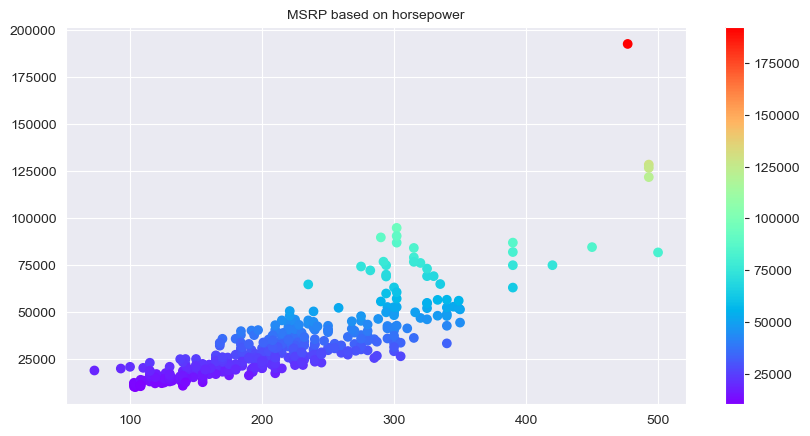

In [297]:
x = cars['Horsepower']
y = cars['MSRP']
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='rainbow')
plt.colorbar()
plt.title("MSRP based on horsepower",fontsize = 10)
plt.show()

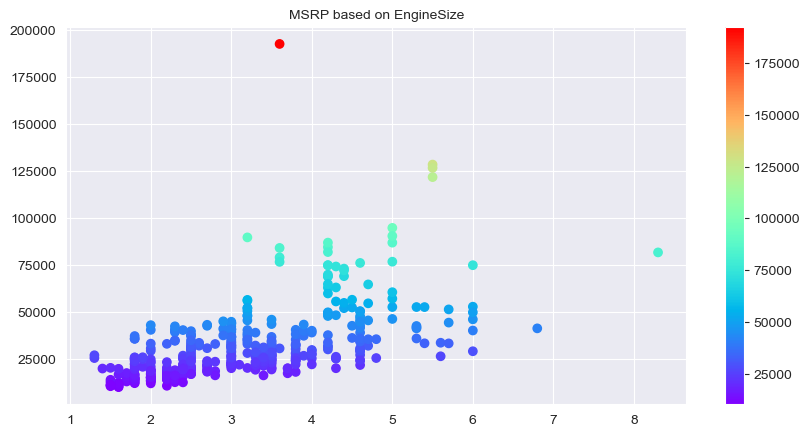

In [298]:
x = cars['EngineSize']
y = cars['MSRP']
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='rainbow')
plt.colorbar()
plt.title("MSRP based on EngineSize",fontsize = 10)
plt.show()

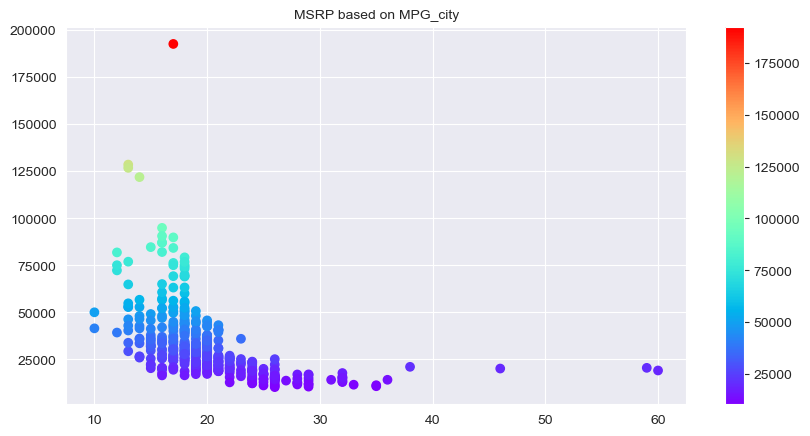

In [299]:
x = cars['MPG_City']
y = cars['MSRP']
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.scatter(x, y, c=y, cmap='rainbow')
plt.colorbar()
plt.title("MSRP based on MPG_city",fontsize = 10)
plt.show()

Text(0.5, 1.0, 'Influence of cylinders on the MSRP')

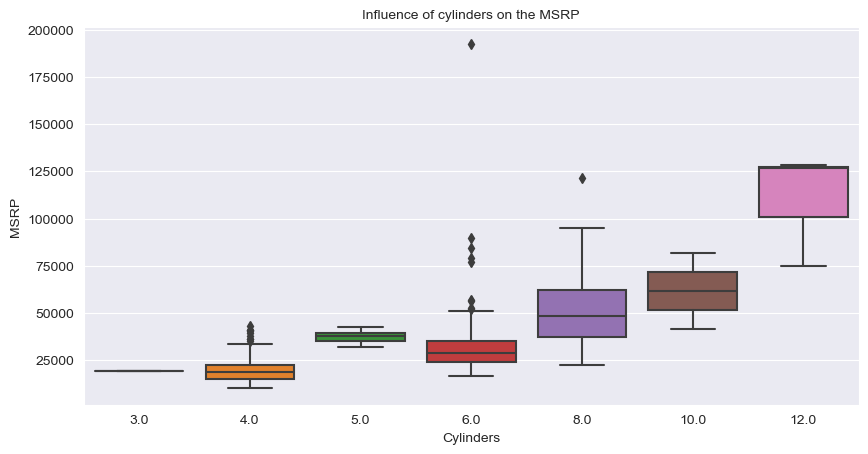

In [300]:
ax=sns.boxplot(x= 'Cylinders', y= "MSRP", data =cars)
ax.set_title("Influence of cylinders on the MSRP",fontsize = 10)

# Linear Regression

In [301]:
x = cars['Horsepower'].values[:,np.newaxis]
y = cars['MSRP']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE: ", mean_squared_error(y_test,predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  135516241.1556488
R squared:  0.6327132824597619


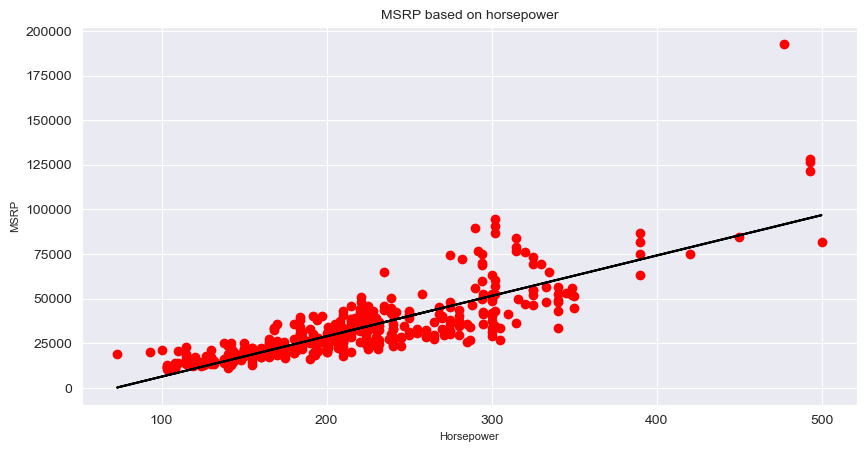

In [302]:
x=cars['Horsepower'].values[:,np.newaxis]
y=cars["MSRP"].values
plt.scatter(x,y,color="r")
plt.title("MSRP based on horsepower", fontsize = 10)
plt.ylabel("MSRP", fontsize = 8)
plt.xlabel("Horsepower", fontsize = 8)
plt.plot(x,model.predict(x),color="k")
plt.show()

In [303]:
x = cars['EngineSize'].values[:,np.newaxis]
y = cars['MSRP']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

model=LinearRegression()   
model.fit(x_train,y_train)  
predicted=model.predict(x_test) 


print("MSE: ", mean_squared_error(y_test,predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  240989516.20917475
R squared:  0.3468513617610157


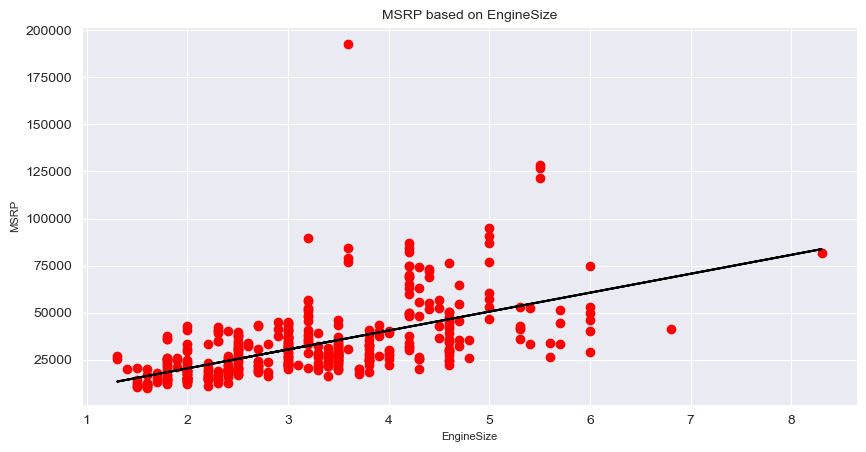

In [304]:
x=cars['EngineSize'].values[:,np.newaxis]
y=cars["MSRP"].values
plt.scatter(x,y,color="r")
plt.title("MSRP based on EngineSize", fontsize = 10)
plt.ylabel("MSRP", fontsize = 8)
plt.xlabel("EngineSize", fontsize = 8)
plt.plot(x,model.predict(x),color="k")
plt.show()

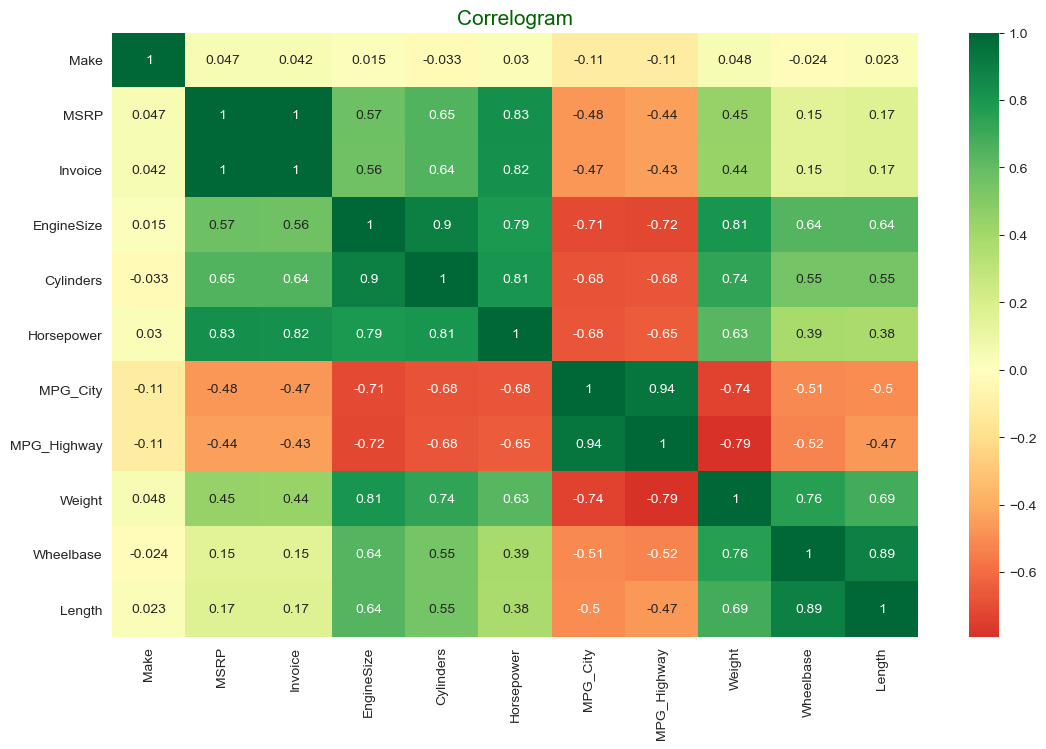

In [305]:
# Quantify correlations
corr = cars.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [306]:
cars= pd.get_dummies(cars, columns=['Origin'])

In [307]:
cars['DriveTrain'].replace({'All':0, 'Front':1, 'Rear':2},inplace=True)

In [308]:
#cars['Origin'].replace({'Asia':0 ,'Europe':1, 'USA':2},inplace=True)

In [309]:
cars['Type'].replace({'SUV':0 ,'Sedan':1, 'Sports':2 ,'Wagon':3 ,'Truck':4 ,'Hybrid':5},inplace=True)

In [310]:
cars

,Make,Type,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Origin_Asia,Origin_Europe,Origin_USA
0,29,0,0,36945,33337,3.5,6.0,265,17,23,4451,106,189,1,0,0
1,29,1,1,23820,21761,2.0,4.0,200,24,31,2778,101,172,1,0,0
2,29,1,1,26990,24647,2.4,4.0,200,22,29,3230,105,183,1,0,0
3,29,1,1,33195,30299,3.2,6.0,270,20,28,3575,108,186,1,0,0
4,29,1,1,43755,39014,3.5,6.0,225,18,24,3880,115,197,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,13,1,1,40565,38203,2.4,5.0,197,21,28,3450,105,186,0,1,0
424,13,1,1,42565,40083,2.3,5.0,242,20,26,3450,105,186,0,1,0
425,13,1,1,45210,42573,2.9,6.0,268,19,26,3653,110,190,0,1,0
426,13,3,1,26135,24641,1.9,4.0,170,22,29,2822,101,180,0,1,0


In [313]:
features=['EngineSize','Cylinders','Length','MPG_Highway','Horsepower','Origin_Asia','Origin_Europe','Origin_USA','Type','Wheelbase','DriveTrain','Weight']

In [314]:
y=cars['MSRP']
x=cars[features]

In [315]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40) 

In [316]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  121688741.34730892
R squared:  0.6701896540967252


In [317]:
def evaluate_models(models,X_train,X_test,y_train,y_test):
    model_names=[]
    R2_M = []
    RMSE_M = []

    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        R2 =r2_score(y_test, y_pred)
        RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
        RMSE_M.append(RMSE)
        R2_M.append(R2)
        model_names.append(model.__class__.__name__)
    data = {
        'model_name':model_names,
        'R2':R2_M,
        'RMSE':RMSE_M
    }
    scoring_df = pd.DataFrame(data)
    return scoring_df.sort_values(by=['RMSE'],ascending=True)

In [318]:
y=cars['MSRP']

#x=cars[features]
x=cars.drop(['MSRP','Invoice'],axis=1)


In [319]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) 

In [320]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           428 non-null    int64  
 1   Type           428 non-null    int64  
 2   DriveTrain     428 non-null    int64  
 3   EngineSize     428 non-null    float64
 4   Cylinders      428 non-null    float64
 5   Horsepower     428 non-null    int64  
 6   MPG_City       428 non-null    int64  
 7   MPG_Highway    428 non-null    int64  
 8   Weight         428 non-null    int64  
 9   Wheelbase      428 non-null    int64  
 10  Length         428 non-null    int64  
 11  Origin_Asia    428 non-null    uint8  
 12  Origin_Europe  428 non-null    uint8  
 13  Origin_USA     428 non-null    uint8  
dtypes: float64(2), int64(9), uint8(3)
memory usage: 38.2 KB


In [333]:
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1,0.15],
                  'iterations'    : [30, 50, 100,200]
                 }
grid = GridSearchCV(estimator=CatBoostRegressor(), param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 18931.6281665	total: 10.8ms	remaining: 2.15s
1:	learn: 17961.1935613	total: 12.1ms	remaining: 1.2s
2:	learn: 17173.1113605	total: 13.2ms	remaining: 870ms
3:	learn: 16606.3786747	total: 14.5ms	remaining: 708ms
4:	learn: 15851.7748924	total: 15.8ms	remaining: 615ms
5:	learn: 15076.3365173	total: 16.7ms	remaining: 540ms
6:	learn: 14470.7192679	total: 17.6ms	remaining: 485ms
7:	learn: 13819.5434085	total: 18.5ms	remaining: 444ms
8:	learn: 13212.2636325	total: 19.6ms	remaining: 415ms
9:	learn: 12711.0956811	total: 20.6ms	remaining: 392ms
10:	learn: 12142.7037951	total: 21.7ms	remaining: 373ms
11:	learn: 11678.3582258	total: 22.7ms	remaining: 356ms
12:	learn: 11213.4345489	total: 23.6ms	remaining: 340ms
13:	learn: 10748.0782123	total: 24.6ms	remaining: 326ms
14:	learn: 10383.8290095	total: 25.5ms	remaining: 315ms
15:	learn: 10039.2857471	total: 26.7ms	remaining: 307ms
16:	learn: 9802.0017771	total: 27.5ms	remaining: 297ms
17:	learn: 9529.7621953	total: 28.7ms	remaining: 290ms
18:	l

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001C53BA86160>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100, 200],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15]})

In [334]:
grid.best_params_

{'depth': 6, 'iterations': 200, 'learning_rate': 0.1}

In [336]:

rfc_model = RandomForestRegressor(random_state=45)
linreg1 = LinearRegression(normalize=True)

lgbm_model = LGBMRegressor(random_state=1)
xgbc_model = XGBRegressor(random_state=441)
grd_model=GradientBoostingRegressor(warm_start=True,max_depth=5,learning_rate=0.05,random_state=13)
KNN_model = KNeighborsRegressor()
catboost_model=CatBoostRegressor(depth=6, iterations= 200, learning_rate=0.1,random_state=3, loss_function='RMSE')

DecisionTree_model = DecisionTreeRegressor()
stack = StackingCVRegressor(regressors=(grd_model,
                    make_pipeline(PolynomialFeatures(4), Ridge())),
                            meta_regressor=Lasso(normalize=True), cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=1)

models = [DecisionTree_model ,rfc_model,xgbc_model,linreg1,grd_model,KNN_model,lgbm_model,stack,catboost_model]

eval_df=evaluate_models(models,X_train,X_test,y_train,y_test)
eval_df

0:	learn: 18898.1383494	total: 5.01ms	remaining: 997ms
1:	learn: 17945.8869344	total: 6.21ms	remaining: 615ms
2:	learn: 17071.1709791	total: 7.21ms	remaining: 473ms
3:	learn: 16231.4990242	total: 8.2ms	remaining: 402ms
4:	learn: 15412.0036469	total: 9.15ms	remaining: 357ms
5:	learn: 14695.1643320	total: 10ms	remaining: 324ms
6:	learn: 14034.2652559	total: 10.9ms	remaining: 301ms
7:	learn: 13484.0727224	total: 11.8ms	remaining: 283ms
8:	learn: 12860.3941844	total: 12.7ms	remaining: 268ms
9:	learn: 12335.4908071	total: 13.6ms	remaining: 258ms
10:	learn: 11876.8584239	total: 14.3ms	remaining: 246ms
11:	learn: 11385.8334366	total: 15.3ms	remaining: 240ms
12:	learn: 10963.8412239	total: 16ms	remaining: 231ms
13:	learn: 10642.7030189	total: 16.9ms	remaining: 224ms
14:	learn: 10350.7331864	total: 17.8ms	remaining: 219ms
15:	learn: 10033.0675546	total: 18.6ms	remaining: 214ms
16:	learn: 9815.3050331	total: 19.5ms	remaining: 210ms
17:	learn: 9566.3823913	total: 20.3ms	remaining: 206ms
18:	learn

,model_name,R2,RMSE
8,CatBoostRegressor,0.864949,6603.625451
6,LGBMRegressor,0.840612,7174.000935
7,StackingCVRegressor,0.832362,7357.320641
1,RandomForestRegressor,0.829664,7416.285739
4,GradientBoostingRegressor,0.807622,7881.547273
3,LinearRegression,0.803149,7972.650015
2,XGBRegressor,0.788882,8256.506074
0,DecisionTreeRegressor,0.757144,8855.403404
5,KNeighborsRegressor,0.678380,10190.723691
